$$ Y_1 = \beta_0 + \beta_1X-i + \epsilon_i $$
<br>
1) $X_i$ is the independent varible <br>
2) $Y_1$ is the dependant variable <br>
3) $\epsilon_1$ is the error

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('3data.csv')
print(data.columns)

Index(['sex', 'age', 'mrd', 'educ', 'cworker', 'region', 'race', 'earnings',
       'height', 'weight', 'occupation'],
      dtype='object')


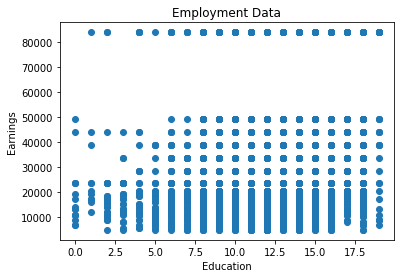

In [3]:
plt.scatter(data['educ'], data['earnings'])
plt.title('Employment Data')
plt.xlabel('Education')
plt.ylabel('Earnings')
plt.show()

In [4]:
print(smf.ols('earnings ~ educ', data=data).fit().summary())

                            OLS Regression Results                            
Dep. Variable:               earnings   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     3166.
Date:                Tue, 19 Feb 2019   Prob (F-statistic):               0.00
Time:                        15:14:25   Log-Likelihood:            -2.0619e+05
No. Observations:               17870   AIC:                         4.124e+05
Df Residuals:                   17868   BIC:                         4.124e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6648.0307    969.179     -6.859      0.0

For every extra year of education, the earnings of the model increases by almost $4,000

Since the P-value is pretty, low, this variable seems to be significant

the overall F-stat is very low, so the overall model seems significant

Overall, since the $R^2$ is .15, then %15 percent of the outcome is described by the model

 #### SST = SSR + SSE <br> $$ \sum(y_i - \bar{y})^2 = \sum(\hat{y}_i - \bar{y})^2 + \sum(y_i - \hat{y}_i)^2 $$

In [5]:
# extract betas for prediction calculations
beta_0 = smf.ols('earnings ~ educ', data = data).fit().params[0]
beta_1 = smf.ols('earnings ~ educ', data = data).fit().params[1]
print(beta_0)
print(beta_1)

-6648.030688952337
3953.761344946341


SST = $$ \sum(y_i - \hat{y}_i)^2 $$

In [6]:
# create new column for predictions
data['earn_pred'] = beta_0 + (data['educ'] * beta_1)

In [7]:
# calculate earnings deviation
data['earn_dev'] = data['earnings'] - data['earn_pred']
# square the deviation
data['earn_dev_sq'] = data['earn_dev']**2
# sum the squares
SSE = data['earn_dev_sq'].sum()
print('SSE =', SSE)

SSE = 11002988177872.889


SSR = $$ \sum(\hat{y}_i - \bar{y})^2 $$

In [11]:
# get mean of earnings
earn_mean = data['earnings'].mean()
# calculate diff of predictions from mean
data['earn_pred_mean_diff'] = data['earn_pred'] - earn_mean
# square the diffs
data['earn_pred_mean_diff_sq'] = data['earn_pred_mean_diff']**2
# sum the diffs
SSR = data['earn_pred_mean_diff_sq'].sum()
print('SSR =', SSR)

SSR = 1949598487698.1267


AttributeError: 'DataFrame' object has no attribute 'ssr'

SST = $$ \sum(y_i - \bar{y})^2 $$

In [9]:
# calculate diff of earnings from mean
data['earn_mean_diff'] = data['earnings'] - earn_mean
# square the diffs
data['earn_mean_diff_sq'] = data['earn_mean_diff']**2
# sum the diffs
SST = data['earn_mean_diff_sq'].sum()
print('SST =', SST)

SST = 12952586665571.19


In [13]:
# Proof (clearly there's a rounding error)
SST - (SSR+SSE)

0.173828125

In [15]:
reg = smf.ols('earnings ~ educ', data=data).fit()
reg.ssr

11002988177872.896